# Image Segmentation Part 1

In another blog of unlocking the true potential of your images, we are going to focus on image segmentation! Today, we'll explore two powerful techniques: thresholding and color image segmentation. Thresholding allows you to separate objects from the background based on pixel intensity, using methods like "trial and error" or the automated Otsu's method. On the other hand, color image segmentation enables the division of an image into meaningful regions based on color. We'll delve into the RGB color space, where you can segment objects based on red, green, and blue channels, as well as the HSV color space, which separates color from brightness. Get ready to uncover the secrets of image segmentation as we embark on a journey to unleash the hidden potential of your images. Let's dive in and discover the magic of segmentation together!

## Thresholding:

Thresholding is a fundamental technique in image segmentation that allows us to unlock valuable information hidden within images. By setting a threshold value, we can separate objects of interest from the background based on their pixel intensities. In this section, we will delve into the fascinating world of thresholding and explore different methods to accomplish this task. 

#### Trial and Error

Trial and error is a simple yet intuitive approach in thresholding for image segmentation. It involves manually adjusting the threshold value and observing the resulting segmentation output until satisfactory results are achieved. The process typically entails visually evaluating the segmentation outcome and iteratively refining the threshold to better separate the objects of interest from the background. While this method can be subjective and time-consuming, it can still be effective in cases where the desired threshold range is apparent or when a quick approximation is sufficient. Trial and error serves as a hands-on, exploratory technique that allows users to experiment and fine-tune the thresholding process to achieve the desired segmentation outcome.

Our sample image is generated from Microsoft Designer with the prompt: blue bean bag in a clean room, wide view.

In [1]:
import os
os.environ['XDG_CACHE_HOME'] = '/home/msds2023/vlopez'

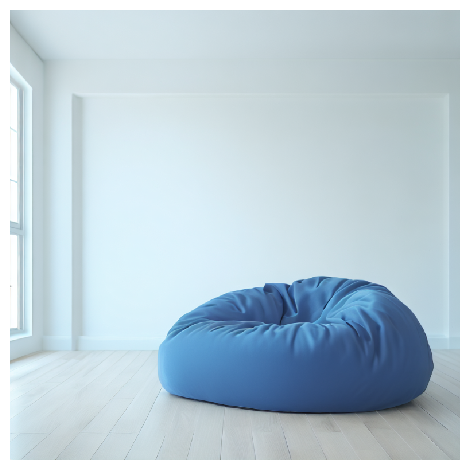

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

blue_bag = imread('blue_bean_bag.PNG')[:,:,:-1]
plt.axis('off')
imshow(blue_bag);

we are going to convert the image of our bean bag to grayscale in order to implement the desired thresholding technique.

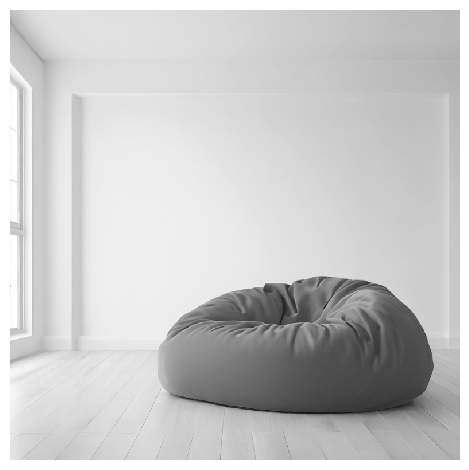

In [55]:
blue_bag_gray = rgb2gray(blue_bag)
plt.axis('off')
imshow(blue_bag_gray);

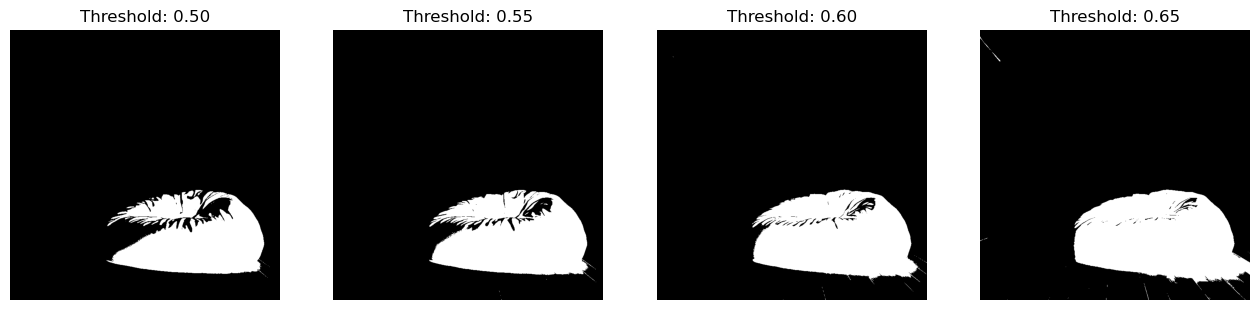

In [65]:
fig, ax = plt.subplots(1, 4, figsize=(16,8))

for k, i in enumerate(np.arange(0.5, 0.7, 0.05)):
    th = i
    ripe_mango_bw = blue_bag_gray < th
    ax[k].imshow(ripe_mango_bw, cmap='gray')
    ax[k].axis('off')
    ax[k].set_title(f'Threshold: {i:.2f}');

#### Otsu's Method

Otsu's method is a powerful algorithm used in thresholding for image segmentation. It automates the process of determining the optimal threshold value by analyzing the histogram of pixel intensities. The method calculates the threshold that minimizes the intra-class variance between foreground and background pixels, maximizing the separability of the two classes. By finding this optimal threshold, Otsu's method ensures that objects are accurately distinguished from the background, even in situations where there is no clear separation based on visual inspection. Otsu's method is widely used as it provides a reliable and efficient way to automatically determine the threshold value, saving time and reducing subjectivity in the thresholding process.

Now let's apply it to our bean bag image. Initially, we extract the histogram of the image.

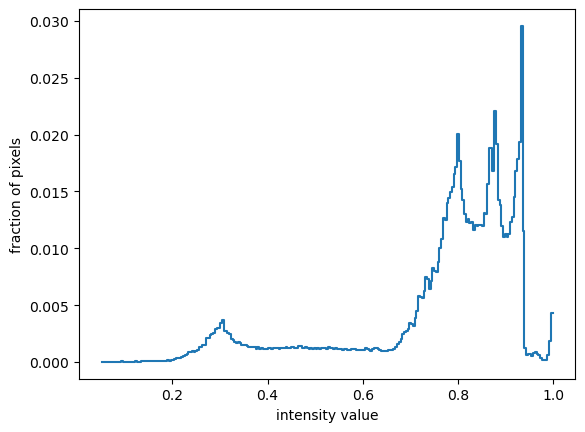

In [66]:
from skimage.exposure import histogram, cumulative_distribution
import matplotlib.pyplot as plt
import numpy as np

freq, bins = histogram(blue_bag_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('intensity value')
plt.ylabel('fraction of pixels');

Next, we set up the necessary variables for implementing Otsu's method.

In [67]:
total = sum(freq)
sumB = 0 # Sum of Background
wB = 0 # Weight of Background
maximum = 0

sum1 = sum(np.arange(0,256) * freq) #Total Sum

In [68]:
levels = []
for i in np.arange(len(bins)):
    wB = wB + freq[i]
    wF = total - wB # Weight of Foreground
    if wB == 0 or wF == 0:
        break
    sumB = sumB + (i-1)*freq[i]
    mF = (sum1 - sumB) / wF # Mean of Foreground
    mB = sumB / wB # Mean of Background
    between = wB * wF * (mB - mF) * (mB - mF)
    levels.append(between)
    if between >= maximum:
        level = i
        maximum = between

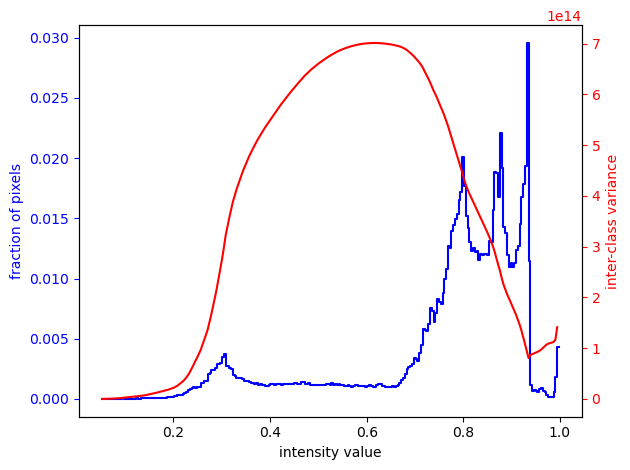

In [69]:
fig, ax1 = plt.subplots()
ax1.step(bins, freq*1.0/freq.sum(),'b')
ax1.set_xlabel('intensity value')

ax1.set_ylabel('fraction of pixels', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(bins[0:255],levels,'r')
ax2.set_ylabel('inter-class variance', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

After calculating the threshold level, we proceed to apply it to the image.

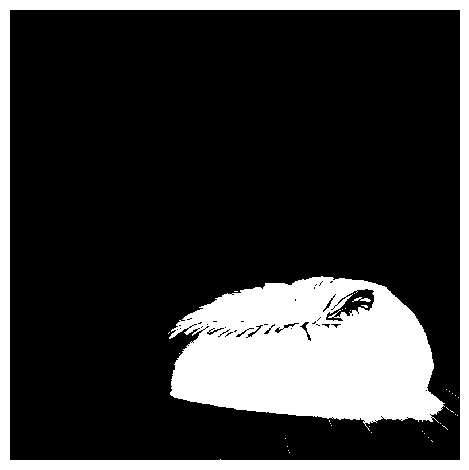

In [163]:
blue_bag_bw = blue_bag_gray<(level*1.0/255)
plt.axis('off')
imshow(blue_bag_bw);

Fortunately, we can streamline the process by utilizing the Otsu's method function available in scikit-image library, eliminating the need for manual calculations and mathematical operations.

To read more about this, read the documentation here: https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.threshold_otsu

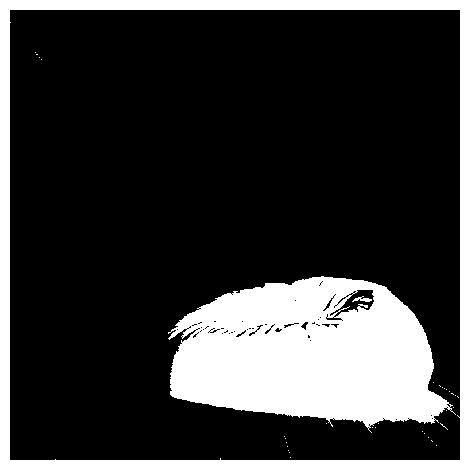

In [168]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(blue_bag_gray)
blue_bag_binary_otsu2  = blue_bag_gray < thresh
plt.axis('off')
imshow(blue_bag_binary_otsu2);

That is a bit easy! Let's try an image that contains multiple bean bags with different colors.

Our second sample image is generated from Microsoft Designer with the prompt: 4 bean bags with colors red green blue yellow in a white room

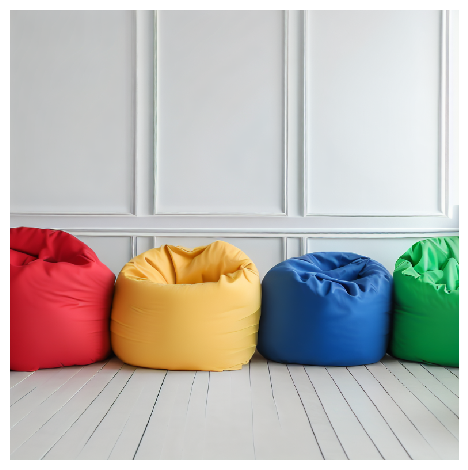

In [160]:
bean_bags = imread('bean_bags.PNG')[:,:,:-1]
plt.axis('off')
imshow(bean_bags);

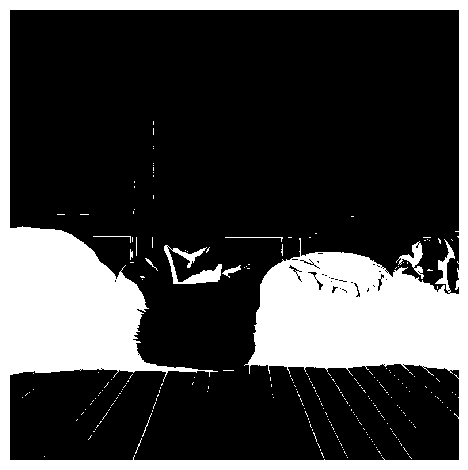

In [161]:
bags_gray = rgb2gray(bean_bags)
plt.axis('off')
imshow(bags_gray);

thresh = threshold_otsu(bags_gray)
bags_binary_otsu2  = bags_gray < thresh
imshow(bags_binary_otsu2);

What changes occurred in our image? If our goal is to isolate and segment only the blue beanbag, how should we proceed with the segmentation process?

## Color Image Segmentation

This is where Color Image Segmentation comes into play. In this section, we will explore the techniques and methodologies that allow us to extract desired objects or regions based on their color properties. By leveraging the unique characteristics of different color spaces and employing suitable thresholding techniques, we can navigate through the vast color landscape and precisely isolate the blue beanbag from the surrounding elements.

#### RGB Color Space

In the context of segmenting objects based on color, the RGB Color Space plays a pivotal role. By combining the red, green, and blue channels, it allows us to represent a vast range of colors. In color image segmentation, the RGB Color Space enables us to define and distinguish objects based on their specific color ranges. By analyzing the intensity values in each channel, we can set thresholds or create masks to separate different color regions within an image. This approach grants us the flexibility and precision to segment objects accurately, leveraging the unique characteristics of their RGB color combinations. 

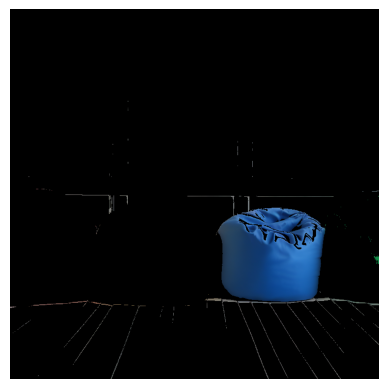

In [162]:
lower_blue = np.array([0, 0, 70], dtype=np.uint8)
upper_blue = np.array([140, 140, 255], dtype=np.uint8)

blue_mask = (
    np.all((bean_bags >= lower_blue) & (bean_bags <= upper_blue), axis=-1)
)
blue_beanbags = np.where(blue_mask[..., np.newaxis], bean_bags, 0)

plt.imshow(blue_beanbags)
plt.axis('off')
plt.show()

This process segments and displays the blue beanbags from an input image. It identifies the blue color range by specifying the lower and upper boundaries for the red, green, and blue channels. By comparing each pixel in the image to this range, a binary mask is created, marking the pixels falling within the blue color range as True. This mask is then applied to the image, resulting in a new image where the blue beanbags are preserved, and other areas become zero.

#### HSV Color Space

The HSV (Hue, Saturation, Value) Color Space is a valuable tool. It separates color information from brightness, allowing us to define specific color ranges for segmenting objects based on their dominant hue. The hue channel represents the primary color, saturation indicates color intensity, and value represents brightness. By analyzing the values in the HSV color space, we can assign labels to different color regions, making it easier to segment objects based on their unique color properties while being less affected by variations in lighting conditions. This makes HSV color space a useful choice for color image segmentation tasks. Now let's apply it again to our sample image of bean bags.

To read more about the function we are going to import, visit the documentation here: https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_hsv.html

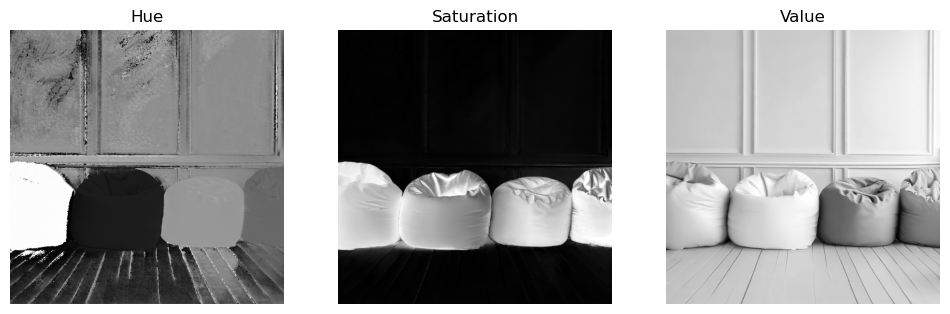

In [164]:
from skimage.color import rgb2hsv

bags_hsv = rgb2hsv(bean_bags)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(bags_hsv[:,:,0], cmap='gray')
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(bags_hsv[:,:,1], cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(bags_hsv[:,:,2], cmap='gray')
ax[2].set_title('Value')
ax[2].axis('off');

The first subplot displays the Hue channel, revealing the dominant colors present in the image. The second subplot illustrates the Saturation channel, indicating the intensity or purity of the colors. Finally, the third subplot presents the Value channel, showcasing the brightness levels of the image. 

Visualizing our images using the intensity values of the HSV color space can be challenging. To overcome this limitation, we will opt for an alternative color map for better visualization.

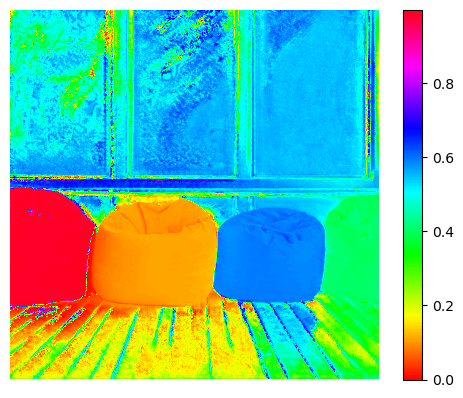

In [165]:
plt.imshow(bags_hsv[:,:,0],cmap='hsv')
plt.axis('off')
plt.colorbar();

We set a lowewr mask by comparing the Hue channel of the bags_hsv image with a threshold value of 0.55 to select pixels with Hue values greater than 0.55. Similarly, an upper mask is created by comparing the Hue channel with a threshold value of 0.7 to select pixels with Hue values less than 0.7. These masks are then combined using element-wise multiplication to create the final mask.

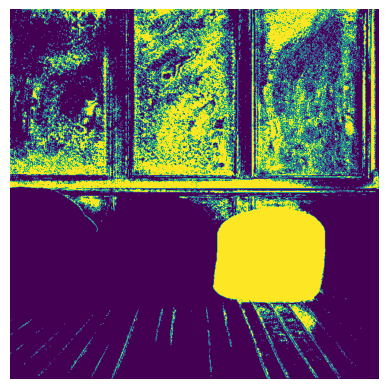

In [166]:
lower_mask = bags_hsv[:,:,0] > 0.55
upper_mask = bags_hsv[:,:,0] < 0.7
mask = upper_mask*lower_mask
plt.axis('off')
plt.imshow(mask);

Let's see the final output!

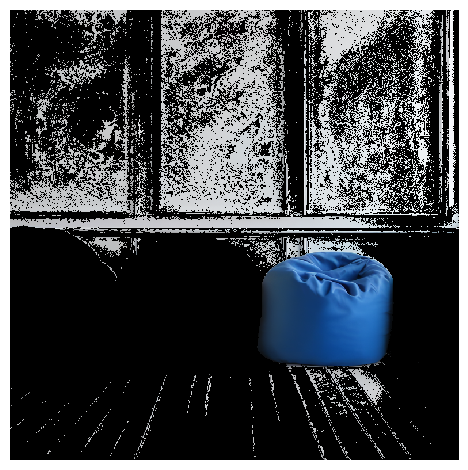

In [167]:
red = bean_bags[:,:,0]*mask
green = bean_bags[:,:,1]*mask
blue = bean_bags[:,:,2]*mask
bags_masked = np.dstack((red,green,blue))
plt.axis('off')
imshow(bags_masked);

Are you satified with the results? Try it yourself and explore how we can segment each bean bag separately!

We explored thresholding and color image segmentation techniques, including the trial and error method, Otsu's method, and the RGB and HSV color spaces. By mastering these techniques, you can effectively separate objects from the background and extract valuable insights hidden within images. Image segmentation offers vast potential in computer vision, medical imaging, and object recognition. Armed with the knowledge gained here, you can now unleash the true potential of your images through the art of segmentation. So, embrace the power of segmentation and embark on your journey of discovery within the pixels of your digital canvas.